In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers 
import tensorflow as tf
from tensorflow import keras
 
from wordcloud import WordCloud
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import load_model # to save the model
from tensorflow.keras import layers, losses
from tensorflow.random import set_seed
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Input, Reshape, Concatenate, GlobalAveragePooling2D, BatchNormalization, Dropout, Activation, GlobalMaxPooling2D
from tensorflow.keras.utils import Sequence

In [25]:
df = pd.read_csv("../input/data-amazon-quality/data_check_recomendation_test_90k.csv", index_col=[0])
# df = np.concatenate([pd.read_csv("../input/data-amazon-full/metadata_amazon_full.csv"),
#                    pd.read_csv("../input/data-amazon-full/metadata_amazon_4_new.csv")])
# df = pd.DataFrame(df, columns = ['id', 'asin', 'categories', 'imUrl', 'title'])
# df = pd.DataFrame(df[['asin', 'categories', 'imUrl', 'title']], columns = ['asin', 'categories', 'imUrl', 'title'])
# print("Data Dimensions are: ", df.shape)
# print("Columns: ", df.columns)
# df


In [26]:
df

,asin,categories,imUrl,title
0,B0002QHKGY,Pet Supplies,http://ecx.images-amazon.com/images/I/41Vm09Fr...,Million Air Pump 80
1,B0002MKC4K,Pet Supplies,http://ecx.images-amazon.com/images/I/311XF1S8...,Fat Cat Kitty Hoots Boogie Mat for de Cat Fishies
2,B0002DIMFK,Pet Supplies,http://ecx.images-amazon.com/images/I/41%2BJBK...,Nekton Labs BNK2530500 Nekton Lori and Keet Di...
3,B0002DQUDQ,Pet Supplies,http://ecx.images-amazon.com/images/I/51kc-8fo...,15 Ct Pork Skin Earz - Part #: DT014
4,B0002HBKT6,Pet Supplies,http://ecx.images-amazon.com/images/I/41dUjwNo...,Kent Marine Tech M 1 Gal
...,...,...,...,...
4995,B001B85YU6,Computers & Accessories,http://ecx.images-amazon.com/images/I/51UXZcbk...,Warrantech 3-Year DOP Warranty for Laptop and ...
4996,B00004Y74F,Computers & Accessories,http://ecx.images-amazon.com/images/I/41SJWQDR...,Mitsubishi Diamond Scan 70 17&quot; Monitor
4997,B00004WZJM,Computers & Accessories,http://ecx.images-amazon.com/images/I/51QYFK45...,ViewSonic G810 21&quot; CRT Monitor (PC/Mac)
4998,B00004Y74E,Computers & Accessories,http://ecx.images-amazon.com/images/I/41ZQXW80...,Mitsubishi Diamond Scan 50M 15&quot; Multimedi...


In [27]:
df = df[['asin', 'categories', 'imUrl', 'title']]

In [28]:
df.head(5)

,asin,categories,imUrl,title
0,B0002QHKGY,Pet Supplies,http://ecx.images-amazon.com/images/I/41Vm09Fr...,Million Air Pump 80
1,B0002MKC4K,Pet Supplies,http://ecx.images-amazon.com/images/I/311XF1S8...,Fat Cat Kitty Hoots Boogie Mat for de Cat Fishies
2,B0002DIMFK,Pet Supplies,http://ecx.images-amazon.com/images/I/41%2BJBK...,Nekton Labs BNK2530500 Nekton Lori and Keet Di...
3,B0002DQUDQ,Pet Supplies,http://ecx.images-amazon.com/images/I/51kc-8fo...,15 Ct Pork Skin Earz - Part #: DT014
4,B0002HBKT6,Pet Supplies,http://ecx.images-amazon.com/images/I/41dUjwNo...,Kent Marine Tech M 1 Gal


In [29]:
df.dropna(subset=['categories', 'imUrl'], axis=0, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   asin        5000 non-null   object
 1   categories  5000 non-null   object
 2   imUrl       5000 non-null   object
 3   title       5000 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB
None


In [30]:
df['categories'].isna().value_counts()

False    5000
Name: categories, dtype: int64

In [31]:
print(len(df.categories.unique()))
df.categories.unique()

20


array(['Pet Supplies', 'Grocery & Gourmet Food', 'Patio, Lawn & Garden',
       'Cell Phones & Accessories', 'Beauty', 'Health & Personal Care',
       'Clothing', 'Arts, Crafts & Sewing', 'Baby', 'Musical Instruments',
       'Automotive', 'Jewelry', 'Home_Improvement', 'Kitchen & Dining',
       'Watches', 'Shoes', 'Home &amp; Kitchen', 'Camera &amp; Photo',
       'Electronics', 'Computers & Accessories'], dtype=object)

In [8]:
# pd.DataFrame(df['categories'].value_counts().sort_values(ascending=False))

In [9]:
# pd.DataFrame(df['categories'].value_counts().sort_values(ascending=False))

In [10]:
# arr_label = ['Cell Phones & Accessories', 'Automotive', 'Shoes',
#        'Jewelry', 'Beauty', 'Home &amp; Kitchen',
#        'Health & Personal Care', 'Grocery & Gourmet Food', 'Pet Supplies',
#        'Patio, Lawn & Garden', 'Arts, Crafts & Sewing', 'Watches', 'Baby',
#        'Musical Instruments', 'Electronics', 'Camera &amp; Photo',
#        'Computers & Accessories', 'Home_Improvement', 'Kitchen & Dining']

In [11]:
# arr_label = ['Health & Personal Care', 'Shoes', 'Jewelry', 'Watches', 'Clothing', 'Beauty', 'Arts, Crafts & Sewing',
#              'Musical Instruments', 'Baby', 'Home & Kitchen', 'Pet Supplies', 'Patio, Lawn & Garden', 'Grocery & Gourmet Food', 
#              'Automotive', 'ComputersComputers', 'Cell Phones & Accessories', 'Kitchen & Dining', 'Home Improvement', 'Electronics']

In [12]:
# arr_label = ['Grocery & Gourmet Food',
# 'Patio, Lawn & Garden',
# 'Cell Phones & Accessories',
# 'Beauty',
# 'Health & Personal Care',
# 'Clothing',
# 'Arts, Crafts & Sewing',
# 'Baby',
# 'Musical Instruments',
# 'Automotive',
# 'Jewelry',
# 'Home_Improvement',
# 'Kitchen & Dining',
# 'Watches',
# 'Shoes',
# 'Home &amp; Kitchen',
# 'Camera &amp; Photo',
# 'Electronics',
# 'Computers & Accessories']

In [13]:
# df.drop_duplicates(subset=['asin', 'categories', 'imUrl', 'title'],inplace=True)
# df = df.dropna()

label new

In [14]:
# arr_label = ['Health & Personal Care', 'Camera & Photo', 'Baby',
#        'Home Improvement', 'Patio, Lawn & Garden', 'Pet Supplies',
#        'Home & Kitchen', 'Arts, Crafts & Sewing', 'Kitchen & Dining',
#        'Beauty', 'Electronics', 'Automotive', 'Grocery & Gourmet Food',
#        'Musical Instruments', 'Computers', 'Cell Phones & Accessories',
#        'Jewelry', 'Shoes', 'Watches']

In [15]:
# a = df.loc[df['categories']=='Clothing'].sample(260)
# for i in arr_label:
#     a = np.concatenate([a,df.loc[df['categories']==i].sample(260)])
# # a = pd.DataFrame(a, columns = ['asin', 'categories', 'imUrl', 'title'])
# a = pd.DataFrame(a, columns = ['asin', 'categories', 'imUrl', 'title'])
# # a['category'] = a['category'].apply(lambda x: x[3:-3])
# a = a.dropna()
# a

In [16]:
# a.to_csv('/kaggle/working/data_check_point_rcm.csv')

In [17]:
# a = df.loc[df['categories']=='Camera_and_Photo'].sample(250)
# for i in arr_label:
#     a = np.concatenate([a,df.loc[df['categories']==i].sample(250)])
# a = pd.DataFrame(a, columns = ['asin', 'categories', 'imUrl'])
# # a = pd.DataFrame(a, columns = ['id', 'imUrl', 'categories'])
# # a['category'] = a['category'].apply(lambda x: x[3:-3])
# a 

In [18]:
# a = a.reset_index()
# a = a.rename(columns={"index": "id"})

In [19]:
# d = list(a['id'])
# print(len(d))

In [20]:
# e = list(a['imUrl'])
# print(len(e))

In [21]:
# t = list(a['asin'])
# len(a['asin'].unique())

In [22]:
# import seaborn as sns
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import LabelEncoder
# import requests
# import urllib
# import cv2
# import re
# from io import BytesIO
# from PIL import Image
# import requests, os
# from os import path

In [23]:
# a['category_label'] = a['categories'].copy()

In [24]:
# category_lable_arr = ['Clothing', 'Cell Phones & Accessories', 'Automotive', 'Shoes',
#        'Jewelry', 'Beauty', 'Home &amp; Kitchen',
#        'Health & Personal Care', 'Grocery & Gourmet Food', 'Pet Supplies',
#        'Patio, Lawn & Garden', 'Arts, Crafts & Sewing', 'Watches', 'Baby',
#        'Musical Instruments', 'Electronics', 'Camera &amp; Photo',
#        'Computers & Accessories', 'Home_Improvement', 'Kitchen & Dining']

In [25]:
# category_lable_arr = ['Pet Supplies',
# 'Grocery & Gourmet Food',
# 'Patio, Lawn & Garden',
# 'Cell Phones & Accessories',
# 'Beauty',
# 'Health & Personal Care',
# 'Clothing',
# 'Arts, Crafts & Sewing',
# 'Baby',
# 'Musical Instruments',
# 'Automotive',
# 'Jewelry',
# 'Home_Improvement',
# 'Kitchen & Dining',
# 'Watches',
# 'Shoes',
# 'Home &amp; Kitchen',
# 'Camera &amp; Photo',
# 'Electronics',
# 'Computers & Accessories']

In [26]:
# category_lable_arr = ['Camera & Photo', 'Health & Personal Care', 'Shoes', 'Jewelry', 'Watches', 'Clothing', 'Beauty', 'Arts, Crafts & Sewing',
#              'Musical Instruments', 'Baby', 'Home & Kitchen', 'Pet Supplies', 'Patio, Lawn & Garden', 'Grocery & Gourmet Food', 
#              'Automotive', 'ComputersComputers', 'Cell Phones & Accessories', 'Kitchen & Dining', 'Home Improvement', 'Electronics']

label new

In [27]:
# category_lable_arr = ['Clothing', 'Health & Personal Care', 'Camera & Photo', 'Baby',
#        'Home Improvement', 'Patio, Lawn & Garden', 'Pet Supplies',
#        'Home & Kitchen', 'Arts, Crafts & Sewing', 'Kitchen & Dining',
#        'Beauty', 'Electronics', 'Automotive', 'Grocery & Gourmet Food',
#        'Musical Instruments', 'Computers', 'Cell Phones & Accessories',
#        'Jewelry', 'Shoes', 'Watches']

In [28]:
# for i in range(0,20):
#     a['categories'][a['categories']==category_lable_arr[i]]=i
# a['categories']=a['categories'].astype(int)

In [29]:
# f = np.array(a['categories'])

In [30]:
# f

In [31]:
# image_array=[]
# lb_array=[]
# id_array=[]
# for i in range(0, 5000):
#     try: 
#         if i in [1, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 4990]:
#             print("sucessful:"+ str(i))
#         response = urllib.request.urlopen(e[i])
#         image = np.asarray(bytearray(response.read()), dtype="uint8") 
#         image = cv2.imdecode(image, cv2.IMREAD_COLOR)
#         image = cv2.resize(image, (224,224)) # resizing all images to one size 
#         image_array.append(image)
#         lb_array.append(f[i])
#         id_array.append(t[i])
        
#     except:
#         continue
# lb_array=np.array(lb_array)
# image_array=np.array(image_array)
# id_array=np.array(id_array)

In [32]:
# lb_array=np.array(lb_array)
# image_array=np.array(image_array)

In [33]:
# id_array

In [34]:
# np.save('lb_array', lb_array)
# np.save('image_array', image_array)
# np.save('id_array', id_array)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import img_to_array

image_array_a = np.load('../input/data-amazon-quality/image_array_q.npy')
lb_array = np.load('../input/data-amazon-quality/lb_array_q.npy')
# id_array = np.load('../input/data-amazon-9175/id_array.npy')
# image_array_a=image_array_a[:2500]
# lb_array=lb_array[:2500]

In [36]:
lb_array

array([ 0,  0,  0, ..., 19, 19, 19])

In [37]:
image_array = []
for i in image_array_a:
    image_array.append(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
image_array = np.array(image_array)
# np.float32(img) / 255.0 
# COLOR_Lab2RGB

In [38]:
# c = []
# d = []
# t = []
# for i in range(0, len(image_array_a)):
#     c.append(image_array_a[i])
#     d.append(lb_array[i])
#     t.append(id_array[i])
# df = pd.DataFrame({'categories': d, 'imUrl': c, 'asin': t})
# df

In [39]:
# a = df.loc[df['categories']==0].sample(250)
# for i in range(1,20):
#     a = np.concatenate([a,df.loc[df['categories']==i].sample(250)])
# a = pd.DataFrame(a, columns = ['categories', 'imUrl', 'asin'])
# # a['category'] = a['category'].apply(lambda x: x[3:-3])
# a

In [40]:
# image_array=[]
# for i in a.imUrl:
#     image_array.append(i)
# image_array = np.array(image_array)
    
# lb_array=[]
# for i in a.categories:
#     lb_array.append(i)
# lb_array = np.array(lb_array)

# id_array=[]
# for i in a.categories:
#     id_array.append(i)
# id_array = np.array(id_array)

In [41]:
# np.save('lb_array_20', lb_array)
# np.save('image_array_20', image_array)
# np.save('id_array_20', id_array)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers 
from keras.layers.core import Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from wordcloud import WordCloud
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import load_model # to save the model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, losses
from tensorflow.random import set_seed
from sklearn.metrics import confusion_matrix

from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [43]:
# Splitting the data
train_images, test_images, train_labels, test_labels=train_test_split(image_array, lb_array, test_size=0.1, random_state=42)
# train_images, test_images, train_labels, test_labels=train_test_split(train_images, train_labels, test_size=0.8, random_state=42)
# Normalize pixel values to be between 0 and 1"
train_images, test_images = train_images / 255.0, test_images / 255.0

In [16]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.regularizers import l1, l2

In [45]:
# model = Sequential()
# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))
# # AveragePooling2D
# #drop 0,3
# #16,16,32,32,64,128
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

# #256, 256
# model.add(Flatten())
# # model.add(Dense(units=4096,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
# #                 bias_regularizer=regularizers.L2(1e-4),
# #                 activity_regularizer=regularizers.L2(1e-5), activation="relu"))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.5))
# # # model.add(Dense(units=512,activation="relu"))
# # # model.add(Dense(units=128,activation="relu"))
# # model.add(Dense(units=4096,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
# #                 bias_regularizer=regularizers.L2(1e-4),
# #                 activity_regularizer=regularizers.L2(1e-5), activation="relu"))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.5))
# model.add(Dense(units=20,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
#                 bias_regularizer=regularizers.L2(1e-4),
#                 activity_regularizer=regularizers.L2(1e-5),activation="softmax"))

In [46]:
# model.summary()

In [47]:
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import SGD
# sgd = SGD(learning_rate = 0.0007, decay = 1e-6, momentum = 0.9, nesterov = True)
# # opt = SGD(lr=0.0005, momentum=0.9)
# # model.compile(optimizer=sgd,
# #                 loss="binary_crossentropy",
# #                 metrics=['accuracy'])

# model.compile(optimizer=sgd,
#                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                 metrics=['accuracy'])

# # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(train_images, train_labels, epochs=70, 
#                     validation_split=0.25,
#                     verbose = 1,
#                     callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=10))


In [5]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Input, Reshape, Concatenate, GlobalAveragePooling2D, BatchNormalization, Dropout, Activation, GlobalMaxPooling2D
from tensorflow.keras.utils import Sequence

In [32]:
from keras.applications.vgg16 import VGG16
from keras.layers import BatchNormalization, Input
from keras.models import Model

input_tensor = Input(shape=(224, 224, 3))
vgg16_weight_path = '../input/full-keras-pretrained-no-top/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrain = VGG16(weights=vgg16_weight_path, include_top=False, input_tensor=input_tensor)

model = pretrain.layers[0].input
x = pretrain.layers[0].output

for i in range(1,len(pretrain.layers)):
#     x = pretrain.layers[i].output
    if i in [2,5,9,13,17]:
#     if "conv" in pretrain.layers[i].name:
#         pretrain.layers[i] = pretrain.layers[i].kernel_regularizer = l2(0.0001)
#         pretrain.layers[i] = pretrain.layers[i].padding="same"
        x = pretrain.layers[i](x)
#         x = Dropout(0.3)(x)
        x = BatchNormalization()(x)
#         x = Dropout(0.3)(x)
    elif i in [3,6,10,14,18]:
#         pretrain.layers[i] = pretrain.layers[i].strides=(2,2)
        x = pretrain.layers[i](x)
    else:
        x = pretrain.layers[i](x)
print(x)
model = tf.keras.Model(inputs=input_tensor, outputs=x)
model.summary()

# 0.00002, 0.3

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='block5_pool/MaxPool:0', description="created by layer 'block5_pool'")
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_10 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)      

In [31]:
pretrain.layers[1].input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_4')>

In [38]:
model.layers[2].output

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'dense')>

In [50]:
# from keras.applications.vgg16 import VGG16
# # load base model
# IMG_SIZE = (224,224)
# vgg16_weight_path = '../input/full-keras-pretrained-no-top/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
# base_model = VGG16(
#     weights=vgg16_weight_path,
#     include_top=False, 
#     input_shape=IMG_SIZE + (3,)
# )

In [33]:
NUM_CLASSES = 20

model = Sequential()
model.add(pretrain)
model.add(layers.Flatten())
model.add(Dense(units=4096, activation='relu'))
# model.add(BatchNormalization())
model.add(Dropout(0.2))
# ,kernel_regularizer=l2(0.0001)
# model.add(Dense(units=512,activation="relu"))
# model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=4096, activation='relu'))
# model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

model.layers[0].trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                8

In [52]:
# train_images = preprocess_input(train_images)
# test_images = preprocess_input(test_images)

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate = 0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
# opt = SGD(lr=0.0005, momentum=0.9)
# model.compile(optimizer=sgd,
#                 loss="binary_crossentropy",
#                 metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer=sgd,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_split=0.22,
                    verbose = 1,
                    callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', mode='max',patience=3))

2022-10-21 07:02:11.138541: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2107392000 exceeds 10% of free system memory.
2022-10-21 07:02:14.004248: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2107392000 exceeds 10% of free system memory.
2022-10-21 07:02:15.733720: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '
2022-10-21 07:02:17.650496: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


110/110 [==============================] - ETA: 0s - loss: 2.9530 - accuracy: 0.1091

2022-10-21 07:02:36.218596: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 594886656 exceeds 10% of free system memory.
2022-10-21 07:02:37.628498: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 594886656 exceeds 10% of free system memory.


110/110 [==============================] - 27s 154ms/step - loss: 2.9530 - accuracy: 0.1091 - val_loss: 2.7329 - val_accuracy: 0.2540
Epoch 2/20
110/110 [==============================] - 10s 93ms/step - loss: 2.6617 - accuracy: 0.2394 - val_loss: 2.5109 - val_accuracy: 0.3350
Epoch 3/20
110/110 [==============================] - 10s 91ms/step - loss: 2.4658 - accuracy: 0.3074 - val_loss: 2.3719 - val_accuracy: 0.3492
Epoch 4/20
110/110 [==============================] - 10s 91ms/step - loss: 2.3262 - accuracy: 0.3420 - val_loss: 2.2854 - val_accuracy: 0.3694
Epoch 5/20
110/110 [==============================] - 10s 92ms/step - loss: 2.2282 - accuracy: 0.3729 - val_loss: 2.2098 - val_accuracy: 0.3715
Epoch 6/20
110/110 [==============================] - 10s 91ms/step - loss: 2.1320 - accuracy: 0.3960 - val_loss: 2.1530 - val_accuracy: 0.3775
Epoch 7/20
110/110 [==============================] - 10s 91ms/step - loss: 2.0576 - accuracy: 0.4126 - val_loss: 2.0977 - val_accuracy: 0.4130
Ep

In [54]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs_range = range(1, len(history.epoch) + 1)

# plt.figure(figsize=(15,5))

# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Train Set')
# plt.plot(epochs_range, val_acc, label='Val Set')
# plt.legend(loc="best")
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Train Set')
# plt.plot(epochs_range, val_loss, label='Val Set')
# plt.legend(loc="best")
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Model Loss')

# plt.tight_layout()
# plt.show()

In [55]:
# cnn_pred = model.predict(test_images, verbose=1)
# cnn_pred = np.argmax(cnn_pred, axis=1) 

In [56]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper right')
# plt.show()

In [57]:
# print("Accuracy : ", model.evaluate(test_images, test_labels))

In [58]:
# category_lable_arr = ['Pet Supplies',
# 'Grocery & Gourmet Food',
# 'Patio, Lawn & Garden',
# 'Cell Phones & Accessories',
# 'Beauty',
# 'Health & Personal Care',
# 'Clothing',
# 'Arts, Crafts & Sewing',
# 'Baby',
# 'Musical Instruments',
# 'Automotive',
# 'Jewelry',
# 'Home_Improvement',
# 'Kitchen & Dining',
# 'Watches',
# 'Shoes',
# 'Home &amp; Kitchen',
# 'Camera &amp; Photo',
# 'Electronics',
# 'Computers & Accessories']

In [59]:
category_lable_arr = ['Pet Supplies', 'Grocery & Gourmet Food', 'Patio, Lawn & Garden',
       'Cell Phones & Accessories', 'Beauty', 'Health & Personal Care',
       'Clothing', 'Arts, Crafts & Sewing', 'Baby', 'Musical Instruments',
       'Automotive', 'Jewelry', 'Home_Improvement', 'Kitchen & Dining',
       'Watches', 'Shoes', 'Home &amp; Kitchen', 'Camera &amp; Photo',
       'Electronics', 'Computers & Accessories']

from sklearn.metrics import classification_report
pre = np.argmax(model.predict(test_images),axis = 1)
print(classification_report(test_labels.astype(str),pre.astype(str),target_names=category_lable_arr))

                           precision    recall  f1-score   support

             Pet Supplies       0.35      0.21      0.26        34
   Grocery & Gourmet Food       0.50      0.64      0.56        28
     Patio, Lawn & Garden       0.10      0.04      0.06        25
Cell Phones & Accessories       0.49      0.83      0.61        23
                   Beauty       0.10      0.09      0.09        23
   Health & Personal Care       0.25      0.05      0.08        20
                 Clothing       0.96      0.93      0.94        27
    Arts, Crafts & Sewing       0.76      0.76      0.76        25
                     Baby       0.53      0.31      0.39        26
      Musical Instruments       0.45      0.68      0.54        19
               Automotive       0.58      0.42      0.49        26
                  Jewelry       0.67      0.82      0.74        17
         Home_Improvement       0.20      0.23      0.22        30
         Kitchen & Dining       0.44      0.77      0.56     

# **retnet**

In [1]:
import numpy as np
from tensorflow.keras.applications import VGG19
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import resnet50

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import img_to_array

image_array = np.load('../input/data-amazon-quality/image_array_q.npy')
label_array = np.load('../input/data-amazon-quality/lb_array_q.npy')

In [3]:
train_images, val_images, train_labels, val_labels=train_test_split(image_array, label_array,
                                                                      test_size=0.3, random_state=42)
val_images,test_images, val_labels, test_labels=train_test_split(val_images, val_labels,
                                                                      test_size=0.33, random_state=42)

train_images, test_images, val_images = train_images / 255, test_images / 255,val_images / 255

print('Number of   training samples : {}'.format(train_images.shape[0]))
print('Number of validation samples : {}'.format(val_images.shape[0]))
print('Number of       test samples : {}'.format(test_images.shape[0]))

Number of   training samples : 3490
Number of validation samples : 1002
Number of       test samples : 495


In [4]:
lr = 0.001
epoch = 5
batch_size = 16

In [5]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [6]:
with strategy.scope():    
    resnet_model = Sequential()
    pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                       input_shape=(224,224,3),
                       pooling='avg')
    for layer in pretrained_model.layers:
        layer.trainable=True

    resnet_model.add(pretrained_model)
    resnet_model.add(Flatten())
#     resnet_model.add(Dense(512, activation='relu'))
    resnet_model.add(Dense(20, activation='softmax'))
    resnet_model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
resnet_model.summary()

2022-10-21 16:23:01.085515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-21 16:23:01.205684: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-21 16:23:01.206506: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-21 16:23:01.207888: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                40980     
Total params: 23,628,692
Trainable params: 23,575,572
Non-trainable params: 53,120
_________________________________________________________________


In [7]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, 
                                            verbose=1,factor=0.3, min_lr=0.001)

In [8]:
history = resnet_model.fit(train_images, train_labels, batch_size = batch_size , epochs = epoch, 
                    validation_data = (val_images,  val_labels),callbacks = [learning_rate_reduction])

2022-10-21 16:23:08.903117: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2101370880 exceeds 10% of free system memory.
2022-10-21 16:23:11.670770: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2101370880 exceeds 10% of free system memory.
2022-10-21 16:23:13.392681: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-10-21 16:23:19.862584: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


219/219 [==============================] - ETA: 0s - loss: 2.0259 - accuracy: 0.4195

2022-10-21 16:23:49.212194: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 603316224 exceeds 10% of free system memory.
2022-10-21 16:23:50.323471: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 603316224 exceeds 10% of free system memory.


219/219 [==============================] - 41s 128ms/step - loss: 2.0259 - accuracy: 0.4195 - val_loss: 4.0692 - val_accuracy: 0.0549
Epoch 2/5
219/219 [==============================] - 24s 108ms/step - loss: 0.8521 - accuracy: 0.7533 - val_loss: 4.1038 - val_accuracy: 0.0679
Epoch 3/5
219/219 [==============================] - 24s 112ms/step - loss: 0.3051 - accuracy: 0.9309 - val_loss: 3.0822 - val_accuracy: 0.3353
Epoch 4/5
219/219 [==============================] - 24s 109ms/step - loss: 0.1023 - accuracy: 0.9851 - val_loss: 2.8194 - val_accuracy: 0.4321
Epoch 5/5
219/219 [==============================] - 24s 109ms/step - loss: 0.0536 - accuracy: 0.9946 - val_loss: 2.1572 - val_accuracy: 0.5269


In [9]:
print("Loss of the model is - " , resnet_model.evaluate(test_images, test_labels)[0])
print("Accuracy of the model is - " , resnet_model.evaluate(test_images, test_labels)[1]*100 , "%")

2022-10-21 16:25:30.247765: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 298045440 exceeds 10% of free system memory.


16/16 [==============================] - 1s 67ms/step - loss: 2.1228 - accuracy: 0.5232
Loss of the model is -  2.122797727584839
16/16 [==============================] - 1s 57ms/step - loss: 2.1228 - accuracy: 0.5232
Accuracy of the model is -  52.32323408126831 %


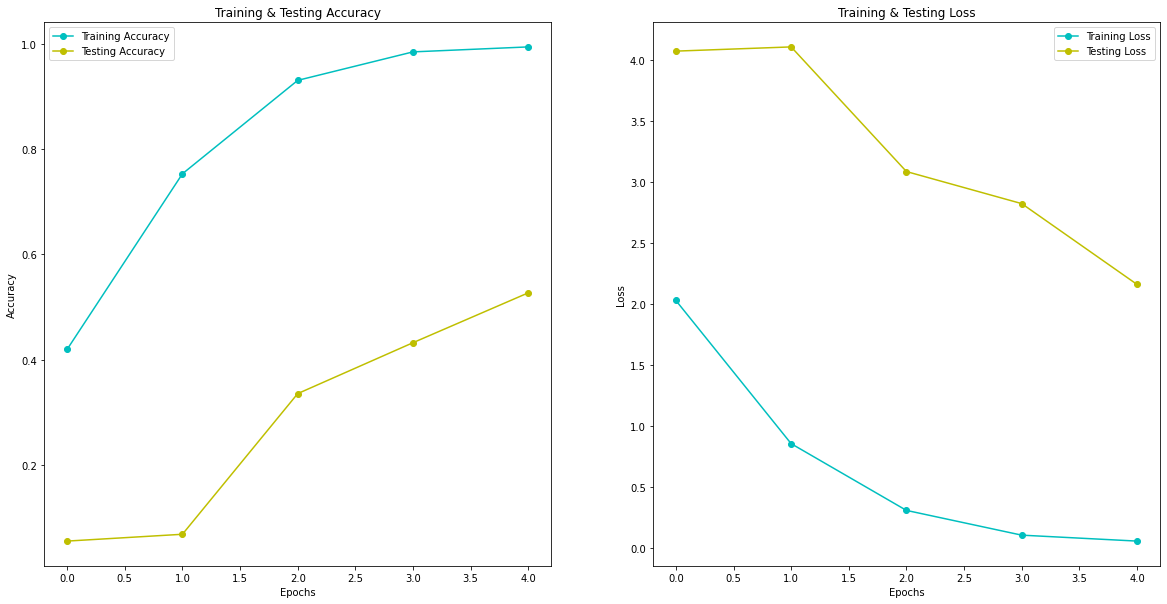

In [10]:
epochs = [i for i in range(epoch)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'co-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'yo-', label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'c-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-o', label= 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [44]:
category_lable_arr = ['Pet Supplies', 'Grocery & Gourmet Food', 'Patio, Lawn & Garden',
       'Cell Phones & Accessories', 'Beauty', 'Health & Personal Care',
       'Clothing', 'Arts, Crafts & Sewing', 'Baby', 'Musical Instruments',
       'Automotive', 'Jewelry', 'Home_Improvement', 'Kitchen & Dining',
       'Watches', 'Shoes', 'Home &amp; Kitchen', 'Camera &amp; Photo',
       'Electronics', 'Computers & Accessories']

from sklearn.metrics import classification_report
pre = np.argmax(resnet_model.predict(test_images),axis = 1)
print(classification_report(test_labels.astype(str),pre.astype(str),target_names=category_lable_arr))

                           precision    recall  f1-score   support

             Pet Supplies       0.50      0.19      0.27        27
   Grocery & Gourmet Food       0.51      0.62      0.56        29
     Patio, Lawn & Garden       0.36      0.12      0.19        32
Cell Phones & Accessories       0.69      0.83      0.75        29
                   Beauty       0.25      0.19      0.21        16
   Health & Personal Care       0.18      0.28      0.22        25
                 Clothing       1.00      0.95      0.98        22
    Arts, Crafts & Sewing       0.96      0.89      0.93        28
                     Baby       0.38      0.43      0.40        21
      Musical Instruments       0.45      0.77      0.57        22
               Automotive       0.55      0.78      0.64        23
                  Jewelry       0.76      0.59      0.67        27
         Home_Improvement       0.62      0.27      0.37        30
         Kitchen & Dining       0.56      0.62      0.59     

In [12]:
resnet_model.save("Resnet50.model", save_format="h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [47]:
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join
from keras.models import load_model

# dimensions of our images
# img_width, img_height = 150, 150

# load the model we saved
model = load_model('./Resnet50.model')
model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
x = np.expand_dims(test_images[215], axis=0)
images = np.vstack([x])


classes = model.predict(images, batch_size=16)
print(np.argmax(classes))
print(test_labels[215])
print(category_lable_arr[np.argmax(classes)])

4
4
Beauty


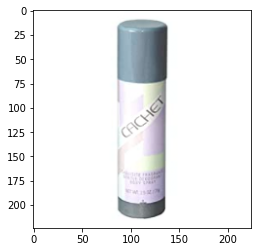

In [48]:
plt.imshow(test_images[215])

In [3]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt

image_array_cm = np.load('../input/data-amazon-quality/image_array_q.npy')
id_array = np.load('../input/data-amazon-quality/id_array_q.npy')
data_frame = pd.read_csv('../input/data-amazon-quality/data_check_recomendation_test_90k.csv', index_col=[0])
print(len(image_array_cm))
print(len(id_array))

4987
4987


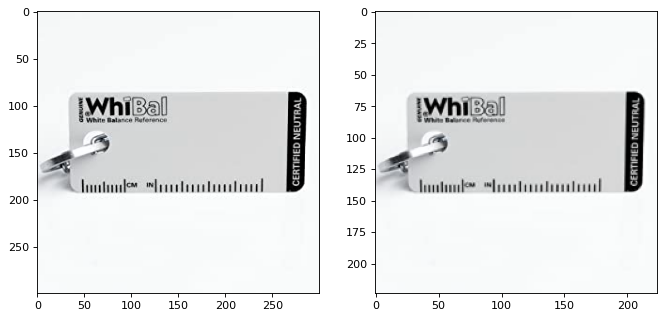

In [4]:
import requests
import urllib
import cv2
response = urllib.request.urlopen(data_frame.imUrl[4326])
image = np.asarray(bytearray(response.read()), dtype="uint8") 
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
image1 = cv2.resize(image, (224,224))
fig = plt.figure(figsize=(10, 7.5), dpi=80)
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(image1)

In [7]:
data_frame.categories.unique()

array(['Pet Supplies', 'Grocery & Gourmet Food', 'Patio, Lawn & Garden',
       'Cell Phones & Accessories', 'Beauty', 'Health & Personal Care',
       'Clothing', 'Arts, Crafts & Sewing', 'Baby', 'Musical Instruments',
       'Automotive', 'Jewelry', 'Home_Improvement', 'Kitchen & Dining',
       'Watches', 'Shoes', 'Home &amp; Kitchen', 'Camera &amp; Photo',
       'Electronics', 'Computers & Accessories'], dtype=object)

In [8]:
arr_image = []
arr_id = []
for i in range(0, len(image_array_cm)):
    arr_image.append(image_array_cm[i])
    arr_id.append(id_array[i])

In [9]:
d = {'image': arr_image, 'id': arr_id}
df = pd.DataFrame(data=d)

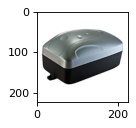

In [10]:
plt.figure(figsize=(2, 1.5), dpi=80)
plt.imshow(df['image'][0])
plt.show()

In [11]:
df_rcm = df.merge(data_frame, left_on='id', right_on='asin')

In [12]:
df_category = df_rcm.loc[df_rcm['categories']=='Arts, Crafts & Sewing'].reset_index(drop=True)

In [13]:
df_category['image'][0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [17]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

2022-10-22 12:26:54.944602: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-22 12:26:55.080157: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-22 12:26:55.080954: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-22 12:26:55.082741: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

553476096/553467096 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [13]:
vgg_model.get_layer("fc2").output

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'fc2')>

In [19]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input
importedImages=[]
for img in df_category['image']:
    #Convert the images to array
    image_batch = np.expand_dims(img, axis=0)
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [20]:
imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

2022-10-22 12:27:08.077219: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-22 12:27:09.775651: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


features successfully extracted!


(249, 4096)

In [ ]:
# c = dot(a,b.T)/(linalg.norm(a)*linalg.norm(b))

In [ ]:
df_category

In [21]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=df_category['id'], index=df_category['id'])
cos_similarities_df

id,B000WWIJLI,B000QGODSI,B000KHDUH8,B000VUP41O,B0000648AK,B000S17YH8,B000WWFPDI,B000WOTCXA,B000I49A5Y,B000C9MVFG,...,B000KNPFKC,B000SN2VYW,B0001DU1RS,B000WWMKY0,B000SMZHRQ,B0001DU22C,B000FKLOLY,B000XADPZ4,B000J39GSA,B000QHDD2O
id,,,,,,,,,,,,,,,,,,,,,
B000WWIJLI,1.000000,0.335699,0.466606,0.220632,0.362306,0.382122,0.372732,0.399738,0.641970,0.277336,...,0.311794,0.294090,0.269785,0.522328,0.298905,0.300872,0.495760,0.279910,0.374991,0.542151
B000QGODSI,0.335699,1.000000,0.332086,0.152776,0.162738,0.325787,0.211061,0.193693,0.240215,0.147349,...,0.234011,0.195933,0.444618,0.247045,0.315787,0.360030,0.428829,0.177676,0.184070,0.386687
B000KHDUH8,0.466606,0.332086,1.000000,0.138182,0.242385,0.354312,0.264023,0.413146,0.373946,0.221014,...,0.197616,0.171504,0.267189,0.305958,0.207958,0.246472,0.429642,0.298024,0.340043,0.443719
B000VUP41O,0.220632,0.152776,0.138182,1.000000,0.141995,0.248000,0.204781,0.211683,0.286885,0.099573,...,0.238746,0.245483,0.192149,0.281586,0.221649,0.198514,0.180629,0.261961,0.176632,0.156516
B0000648AK,0.362306,0.162738,0.242385,0.141995,1.000000,0.191621,0.410482,0.236206,0.382423,0.812045,...,0.195373,0.151724,0.163464,0.354411,0.216823,0.178638,0.336094,0.221085,0.261671,0.315363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B0001DU22C,0.300872,0.360030,0.246472,0.198514,0.178638,0.362409,0.231648,0.246550,0.276108,0.129767,...,0.168062,0.199239,0.251009,0.245958,0.496766,1.000000,0.222349,0.236336,0.117218,0.229702
B000FKLOLY,0.495760,0.428829,0.429642,0.180629,0.336094,0.383753,0.369109,0.322894,0.394167,0.289430,...,0.280341,0.258563,0.308614,0.454317,0.217257,0.222349,1.000000,0.325143,0.332168,0.486666
B000XADPZ4,0.279910,0.177676,0.298024,0.261961,0.221085,0.444397,0.258689,0.428124,0.324258,0.177894,...,0.178247,0.327292,0.208910,0.413456,0.203920,0.236336,0.325143,1.000000,0.461948,0.319357


In [22]:
imgs_model_width, imgs_model_height = 224,224

In [ ]:
# original = load_img('./oooo.jpg', target_size=(imgs_model_width, imgs_model_height))

In [ ]:
# c = []
# t = []
# for i in range(0, len(df_category)):
#     c.append(image_array_cm[i])
#     t.append(id_array[i])
# res = {}
# for key in t:
#     for value in c:
#         res[key] = value
#         c.remove(value)
#         break 

In [23]:
import re
def image_recommend_1(pid,num_recommend = 5):
    
    """
    PID: Product ID of the original item in our dataset
    num_recommend : Number of most similar images to retrieve
    
    """
    
    print("-----------------------------------------------------------------------")
    print("Original product:")
    print("-----------------------------------------------------------------------")
    
    print("\nProduct ID : ",df_category.asin[pid])
    print("Title : ",df_category.title[pid])
    print("Brand : ",df_category.categories[pid])
    print("link : ",df_category.imUrl[pid])
    
    plt.figure(figsize=(6, 4.5), dpi=80)
    plt.imshow(df_category.image[pid])
    plt.show()
#     cos_similarities_df_copy = cos_similarities_df.copy()
    
    
    # getting the indexes and scores of the N most similar products
    closest_imgs = cos_similarities_df.sort_values(df_category['id'][pid],ascending=False)[1:num_recommend+1].index
    closest_imgs_scores = cos_similarities_df[df_category['id'][pid]].sort_values(ascending=False)[1:num_recommend+1]

    
    _re_digits = re.compile(r'\d+') #We use regex to extract only the pids from file names
    closest_imgs_pid = []
    for element in closest_imgs:
        closest_imgs_pid += [int(n) for n in _re_digits.findall(element)]
    
    # Displaying the recommended products- Image, PID, Name, Brand and Similarity Score

    print("-----------------------------------------------------------------------")
    print("Most similar products:")
    print("-----------------------------------------------------------------------") 
    
    list_link = []
    for i in closest_imgs:
        print("\nProduct ID : ",i)
        print("Title : ",df_category.loc[df_category['id']==i].reset_index(drop=True).title[0])
        print("Brand : ",df_category.loc[df_category['id']==i].reset_index(drop=True).categories[0])
        list_link.append(df_category.loc[df_category['id']==i].reset_index(drop=True).imUrl[0])
        print("link : ",df_category.loc[df_category['id']==i].reset_index(drop=True).imUrl[0])
        print("similarity score : ",closest_imgs_scores[i])

#         df_rcm['image'][0]
        img = df_category.loc[df_category['id']==i].reset_index(drop=True).image[0]
        plt.figure(figsize=(6, 4.5), dpi=80)
        plt.imshow(img)
        plt.show()

In [ ]:
df_category.imUrl.drop_duplicates()

In [ ]:
# df_category.loc[df_category['id']=='B006ZGCH18'].reset_index(drop=True).title[0]

-----------------------------------------------------------------------
Original product:
-----------------------------------------------------------------------

Product ID :  B000KSF4VW
Title :  Kwik Sew K3341 Skort and Shorts Sewing Pattern, Size XS-S-M-L-XL
Brand :  Arts, Crafts & Sewing
link :  http://ecx.images-amazon.com/images/I/51fW-jEF82L._SY300_.jpg


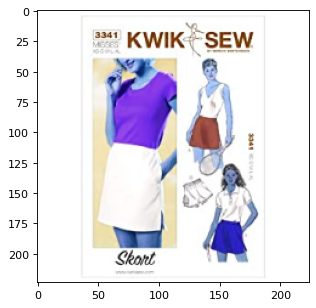

-----------------------------------------------------------------------
Most similar products:
-----------------------------------------------------------------------

Product ID :  B000L5R6Z6
Title :  McCall's Patterns M4975 Misses' Lined and Unlined Jackets and Flower, Size XZ (XLG-XXL)
Brand :  Arts, Crafts & Sewing
link :  http://ecx.images-amazon.com/images/I/51qH4W51NTL._SY300_.jpg
similarity score :  0.7626389


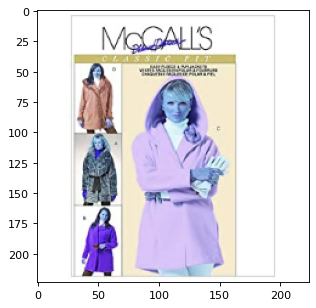


Product ID :  B000KHDUH8
Title :  Butterick Patterns B4807 Misses'/Misses' Petite Pants and Sash, Size EE (14-16-18-20)
Brand :  Arts, Crafts & Sewing
link :  http://ecx.images-amazon.com/images/I/51qvl-9cFML._SY300_.jpg
similarity score :  0.73104936


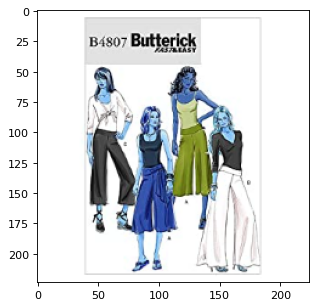


Product ID :  B000KS9E5E
Title :  Kwik Sew K3052 Unitards Sewing Pattern, Size XS-S-M-L-XL
Brand :  Arts, Crafts & Sewing
link :  http://ecx.images-amazon.com/images/I/51I18-7LMoL._SY300_.jpg
similarity score :  0.68252164


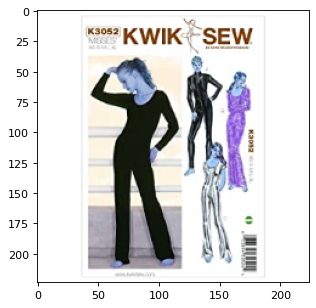


Product ID :  B000KHDOS8
Title :  Butterick Patterns B3475 Boy's Shirt &amp; Shorts, Size 2-3-4-5
Brand :  Arts, Crafts & Sewing
link :  http://ecx.images-amazon.com/images/I/51f71-nV%2BpL._SY300_.jpg
similarity score :  0.6785908


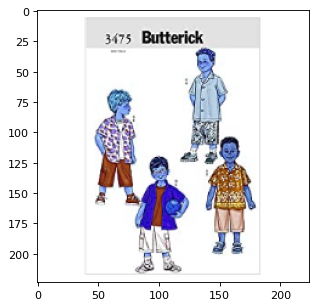


Product ID :  B000MU1O1M
Title :  Simplicity Sewing Pattern 4192 Misses Sportswear, R5 (14-16-18-20-22)
Brand :  Arts, Crafts & Sewing
link :  http://ecx.images-amazon.com/images/I/510yZvez%2BuL._SY300_.jpg
similarity score :  0.6714206


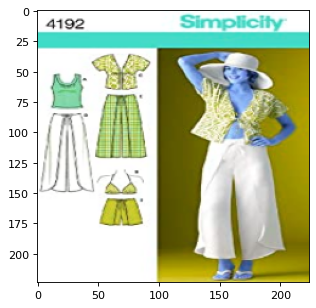

In [24]:
image_recommend_1(30,5)

#### image_recommend_1(57,5)

In [ ]:
# fig,ax = plt.subplots(1,7)
# for i in range(7):
#     ax[i].imshow(data_train[i][0].view(28,28))
#     ax[i].set_title(data_train[i][1])
#     ax[i].axis('off')

In [ ]:
url = row['Product_Image']
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.save('C:/Users/dira9/Documents/SFSU fall 2020 semester/DS 862/Final project/amazon/images/'+ str(row['PID'])+'.jpeg')